In [2]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

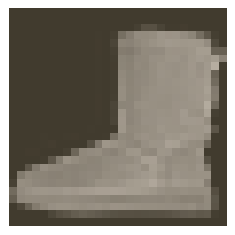

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [16]:
from collections import OrderedDict
from torch import optim,nn


input_units = 784
hidden_units = [256,128,64]
output_units = 10

model = nn.Sequential(OrderedDict([
                        ('fc1',nn.Linear(input_units,hidden_units[0])),
                        ('ReLU1',nn.ReLU()),
                        ('fc2',nn.Linear(hidden_units[0],hidden_units[1])),
                        ('ReLU2',nn.ReLU()),
                        ('fc3',nn.Linear(hidden_units[1],hidden_units[2])),
                        ('ReLU3',nn.ReLU()),
                        ('output',nn.Linear(hidden_units[2],output_units)),
                        ('log_softmax',nn.LogSoftmax(dim = 1))]))

optimizer = optim.Adam(model.parameters(), lr = 0.01)
criterion = nn.NLLLoss()
epochs = 10
for i in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        out = model(images)
        loss = criterion(out,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5720409687394018
Training loss: 0.4631157530459768
Training loss: 0.43399371486355753
Training loss: 0.4150371465569874
Training loss: 0.40185754477723573
Training loss: 0.392879853942501
Training loss: 0.39197452096288393
Training loss: 0.38285219873478415
Training loss: 0.3795934832934886
Training loss: 0.371561477806713


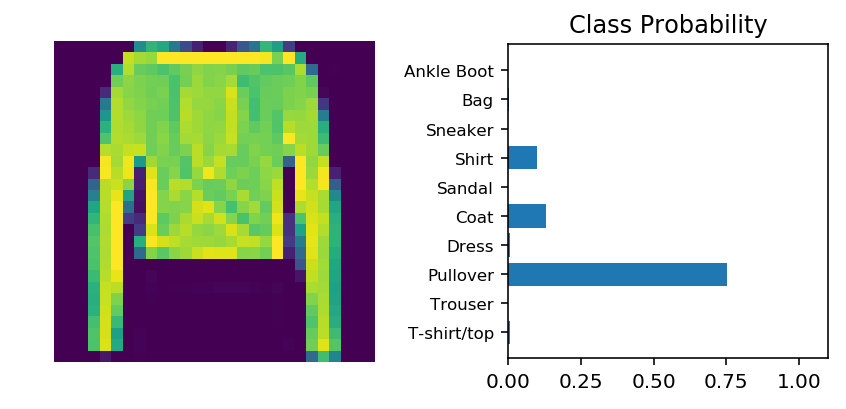

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[54]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')